<br><br><br>

#Work in Progress

In [8]:
import numpy as np 
import pandas as pd 

from subprocess import check_output
stations = pd.read_csv('D:/Studies/semester 4/project/cycle-share-dataset/station.csv')
trips = pd.read_csv('D:/Studies/semester 4/project/cycle-share-dataset/trip.csv', error_bad_lines=False)

weathers = pd.read_csv('D:/Studies/semester 4/project/cycle-share-dataset//weather.csv')

stations.head(5)

Skipping line 50794: expected 12 fields, saw 20



,station_id,name,lat,long,install_date,install_dockcount,modification_date,current_dockcount,decommission_date
0,BT-01,3rd Ave & Broad St,47.618418,-122.350964,10/13/2014,18,NaN,18,NaN
1,BT-03,2nd Ave & Vine St,47.615829,-122.348564,10/13/2014,16,NaN,16,NaN
2,BT-04,6th Ave & Blanchard St,47.616094,-122.341102,10/13/2014,16,NaN,16,NaN
3,BT-05,2nd Ave & Blanchard St,47.613110,-122.344208,10/13/2014,14,NaN,14,NaN
4,CBD-03,7th Ave & Union St,47.610731,-122.332447,10/13/2014,20,NaN,20,NaN


In [3]:
import matplotlib.pyplot as plt

trips.gender

from collections import defaultdict

# count genders
counts = defaultdict(int)
for e in trips.gender:
    counts[e] += 1

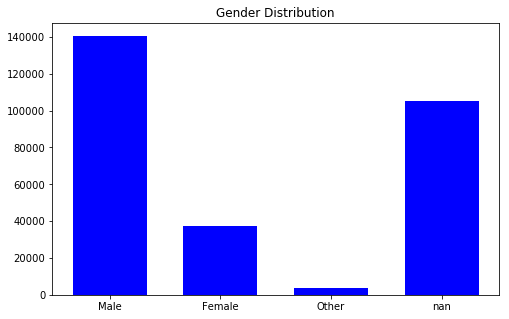

In [4]:
# Gender distribution
y = [e[1] for e in counts.items()][:4]
x = range(len(y))
cols = [e[0] for e in counts.items()][:4]
    
plt.figure(figsize=(8,5))
plt.bar(x, y, color='blue', width=1/1.5)
plt.xticks(x, cols)
plt.title('Gender Distribution')
plt.show()

In [4]:
# Bikes with trip duration

#print(trips.birthyear)

bike_stats = defaultdict(int)
dur_stats = defaultdict(float)
by_stats = defaultdict(int)

for t in trips.itertuples():
    bike_stats[t.bikeid] += 1
    dur_stats[t.bikeid] += t.tripduration
    by_stats[str(t.birthyear)] += 1
    #break
    
#for bid in dur_stats.keys():
#    dur_stats[bid] /= bike_stats[bid]
    
    
#for e, k in zip(dur_stats, bike_stats):
    #print(dur_stats[k], " ", bike_stats[e])
    
print(len(by_stats.keys()))
#print(by_stats)

62


1931 1999


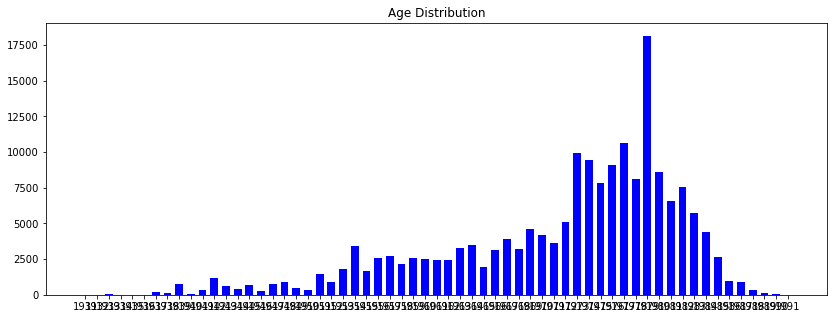

In [6]:
keys = sorted(by_stats.keys())[:-1] # without nan


# Age distribution

y = [by_stats[k] for k in keys]

cols = [by_stats[k] for k in keys]
    
    
minyear = int(min(keys)[:-2])
maxyear = int(max(keys)[:-2])
print(minyear, maxyear)
minamp=0
maxamp=40

x = range(minyear, maxyear, 50)
x = range(minyear, maxyear)

x = x[:61]

# evalutate with histogram
plt.figure(figsize=(14,5))
plt.bar(x, y, color='blue', width=1/1.5)
#plt.hist(cols, 10)
plt.xticks(x, [e for e in x])
#plt.axis([minyear, maxyear, minamp, maxamp])
plt.title('Age Distribution')
plt.show()